In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

In [2]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Project-01\Red-Wine-Predication-\data\WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
# null values 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

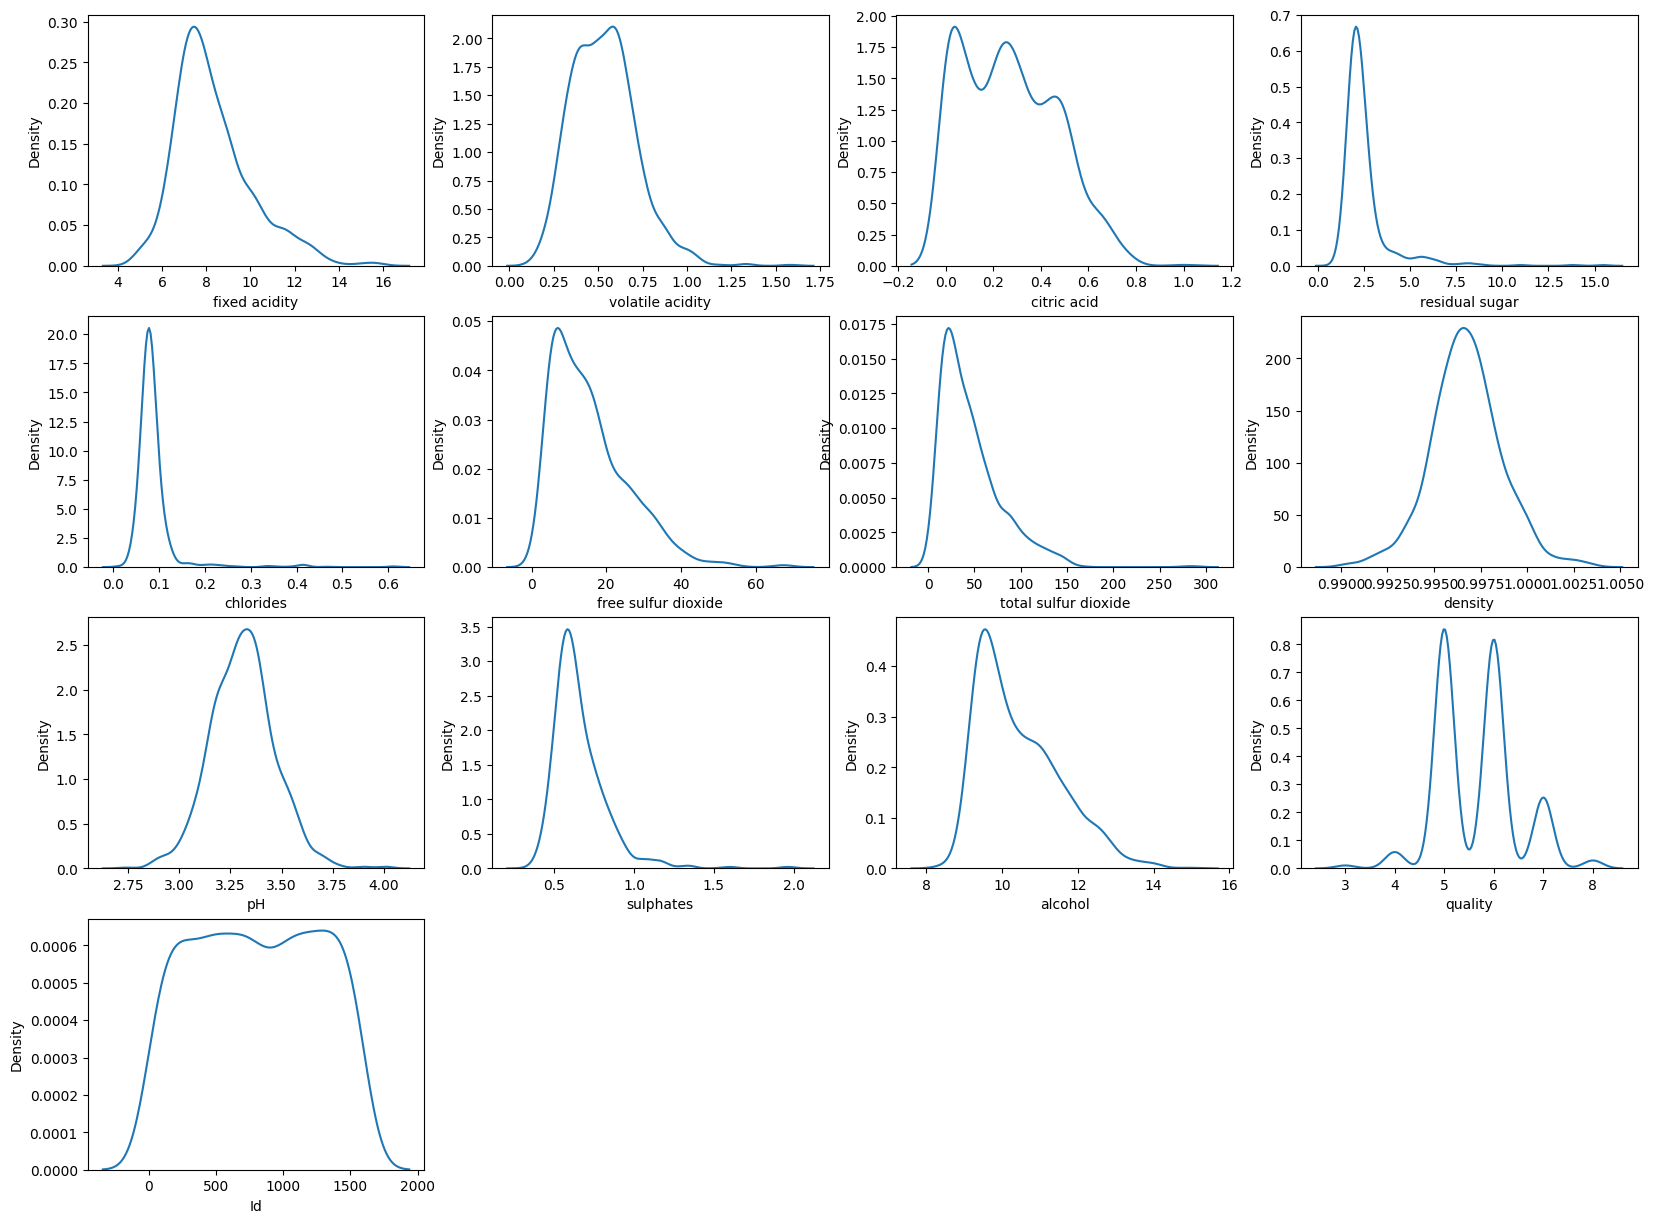

In [6]:
plt.figure(figsize=(20,15))
for i,col_name in enumerate(df.columns):
    plt.subplot(4,4,i+1)
    sns.kdeplot(df[col_name])
    plt.plot()
    

In [7]:
# If skewness is less than -1 or greater than 1, the distribution is highly skewed.
df.skew().sort_values()

Id                     -0.010419
density                 0.102395
pH                      0.221138
quality                 0.286792
citric acid             0.371561
volatile acidity        0.681547
alcohol                 0.863313
fixed acidity           1.044930
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
sulphates               2.497266
residual sugar          4.361096
chlorides               6.026360
dtype: float64

In [16]:
# Remove skweness
# Log transformation
df['free sulfur dioxide'] = df['free sulfur dioxide'].apply(np.log)
df['total sulfur dioxide'] = df['total sulfur dioxide'].apply(np.log)
df['sulphates'] = df['sulphates'].apply(np.log)
df['residual sugar']=df['residual sugar'].apply(np.log)
df['chlorides']=df['chlorides'].apply(np.log)

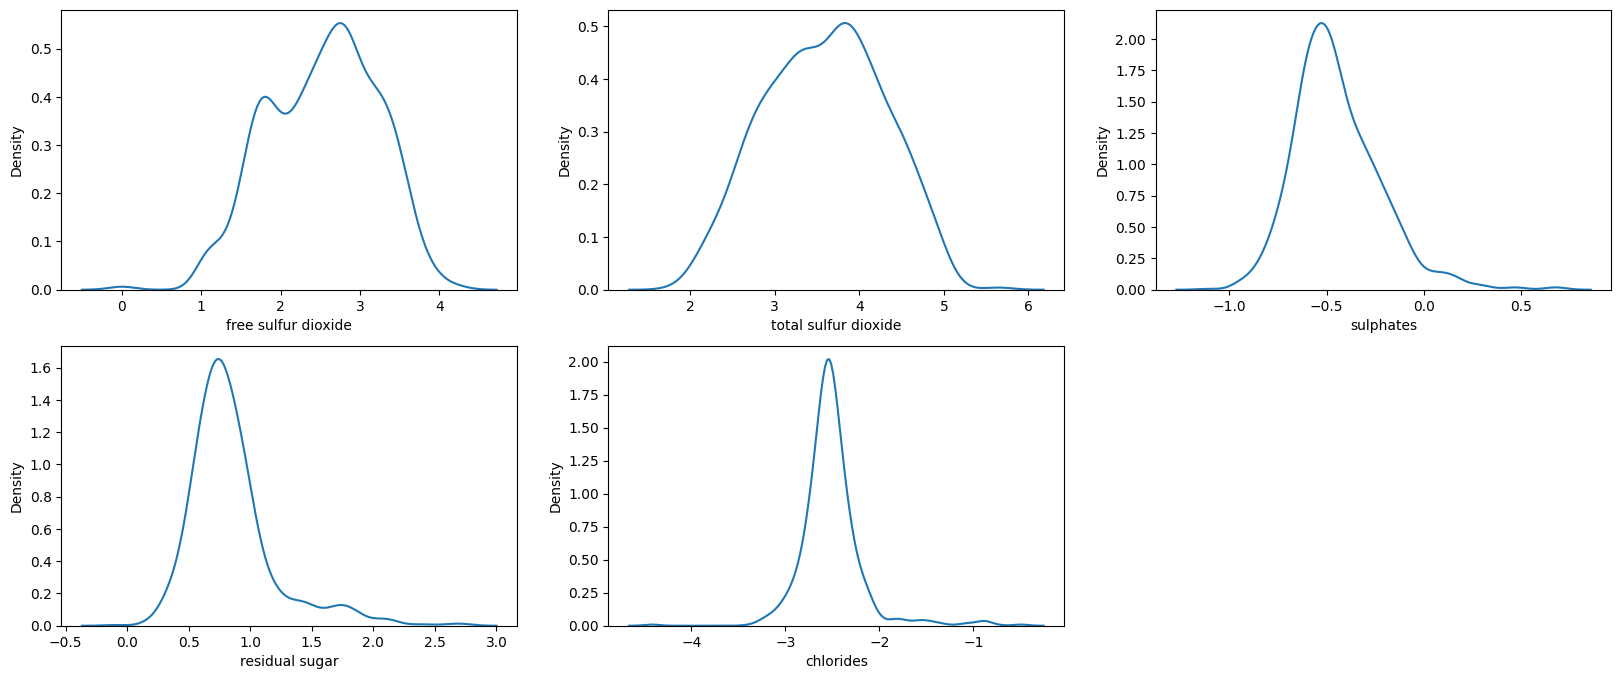

In [21]:
# this good normal distribution 
apply_log_transform = ['free sulfur dioxide','total sulfur dioxide','sulphates','residual sugar','chlorides']

plt.figure(figsize=(20,8))
for i,col_name in enumerate(apply_log_transform):
    plt.subplot(2,3,i+1)
    sns.kdeplot(df[col_name])
    plt.plot()
    

<Axes: xlabel='quality'>

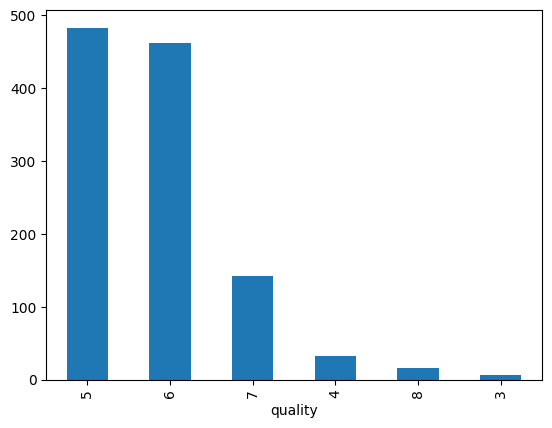

In [22]:
df['quality'].value_counts().plot(kind='bar')

The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones)

As you have noticed we are dealing with an impalanced dataset, to handle this I'll use SMOTE Oversampling.

Oversampling refers to copying or synthesizing new examples of the minority classes so that the number of examples in the minority class better resembles or matches the number of examples in the majority classes.

In [23]:
# percentage  of data in distribute each class
df['quality'].value_counts(normalize=True)*100 

quality
5    42.257218
6    40.419948
7    12.510936
4     2.887139
8     1.399825
3     0.524934
Name: proportion, dtype: float64

In [24]:
temp = df.drop(['Id'],axis=1)

In [25]:
avg_quality = temp.groupby(['quality']).mean()
avg_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,0.890420,-2.341644,1.901261,2.972624,0.997682,3.361667,-0.609041,9.691667
4,7.809091,0.700000,0.165758,0.859799,-2.512339,2.454569,3.430877,0.996669,3.391212,-0.511051,10.260606
5,8.161077,0.585280,0.240124,0.849572,-2.458069,2.591030,3.770087,0.997073,3.302091,-0.515060,9.902277
6,8.317749,0.504957,0.263680,0.826572,-2.522489,2.515970,3.503210,0.996610,3.323788,-0.413444,10.655339
7,8.851049,0.393671,0.386573,0.922205,-2.644662,2.463984,3.373443,0.996071,3.287133,-0.314847,11.482634
8,8.806250,0.410000,0.432500,0.880618,-2.668364,2.158478,3.172527,0.995553,3.240625,-0.276985,11.937500


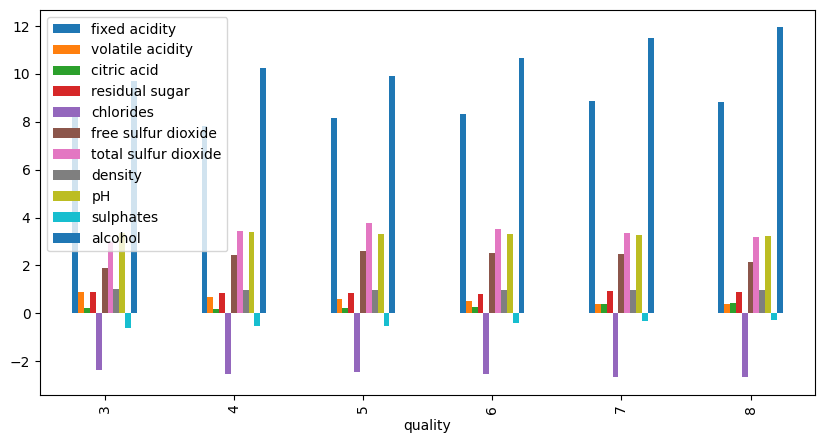

In [26]:
avg_quality.plot(kind="bar",figsize=(10,5));

now we see the effect of the elements on the quality 


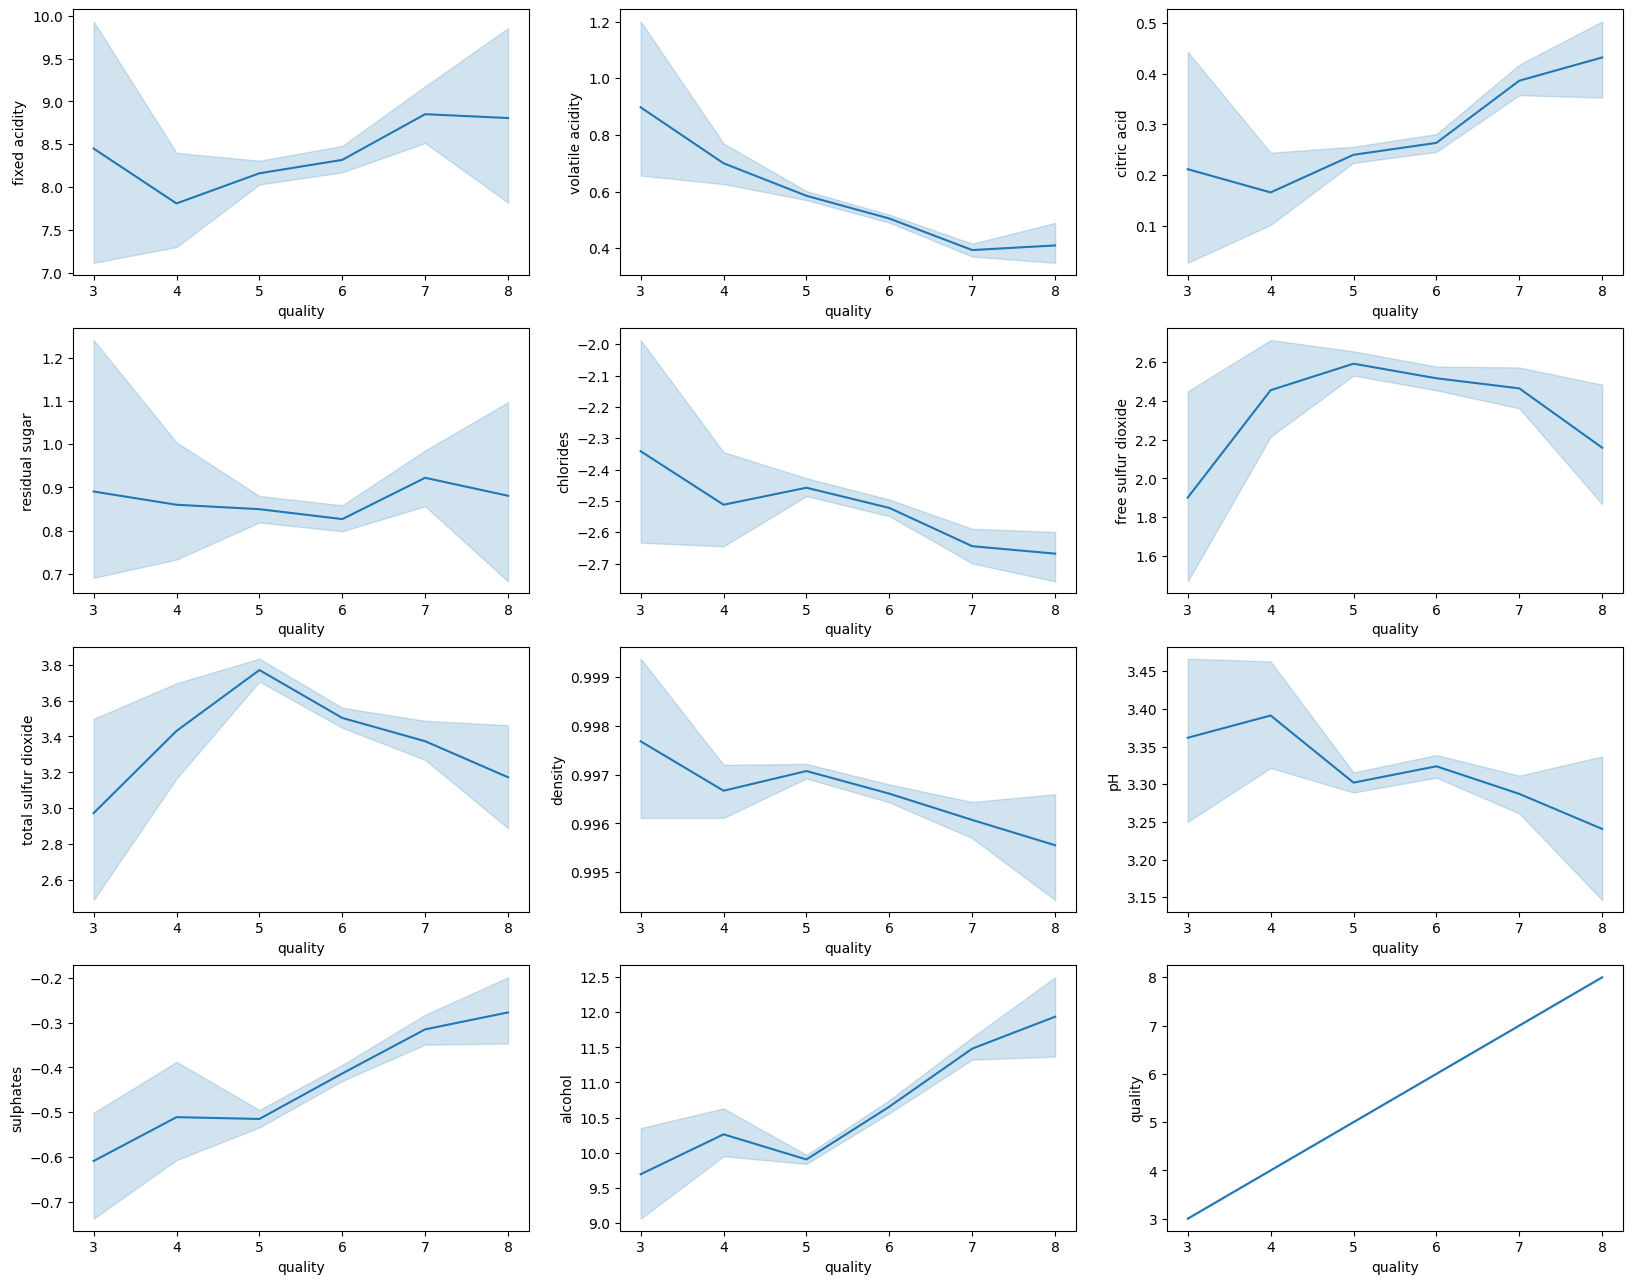

In [27]:
# each point contribute part of quality 

plt.figure(figsize=(20,20))
for i,col_name in enumerate(temp.columns):
    plt.subplot(5,3,i+1)
    sns.lineplot(data=temp, x='quality',y=col_name)
    
    

In [28]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4,5,0
1,7.8,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8,5,1
2,7.8,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,9.8,5,2
3,11.2,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,9.8,6,3
4,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4,5,4


In [29]:
# remove 'Id' Columns 
df.drop(['Id'],axis=1,inplace=True)
df.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4,5
1,7.8,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8,5
2,7.8,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,9.8,5
3,11.2,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,9.8,6
4,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4,5


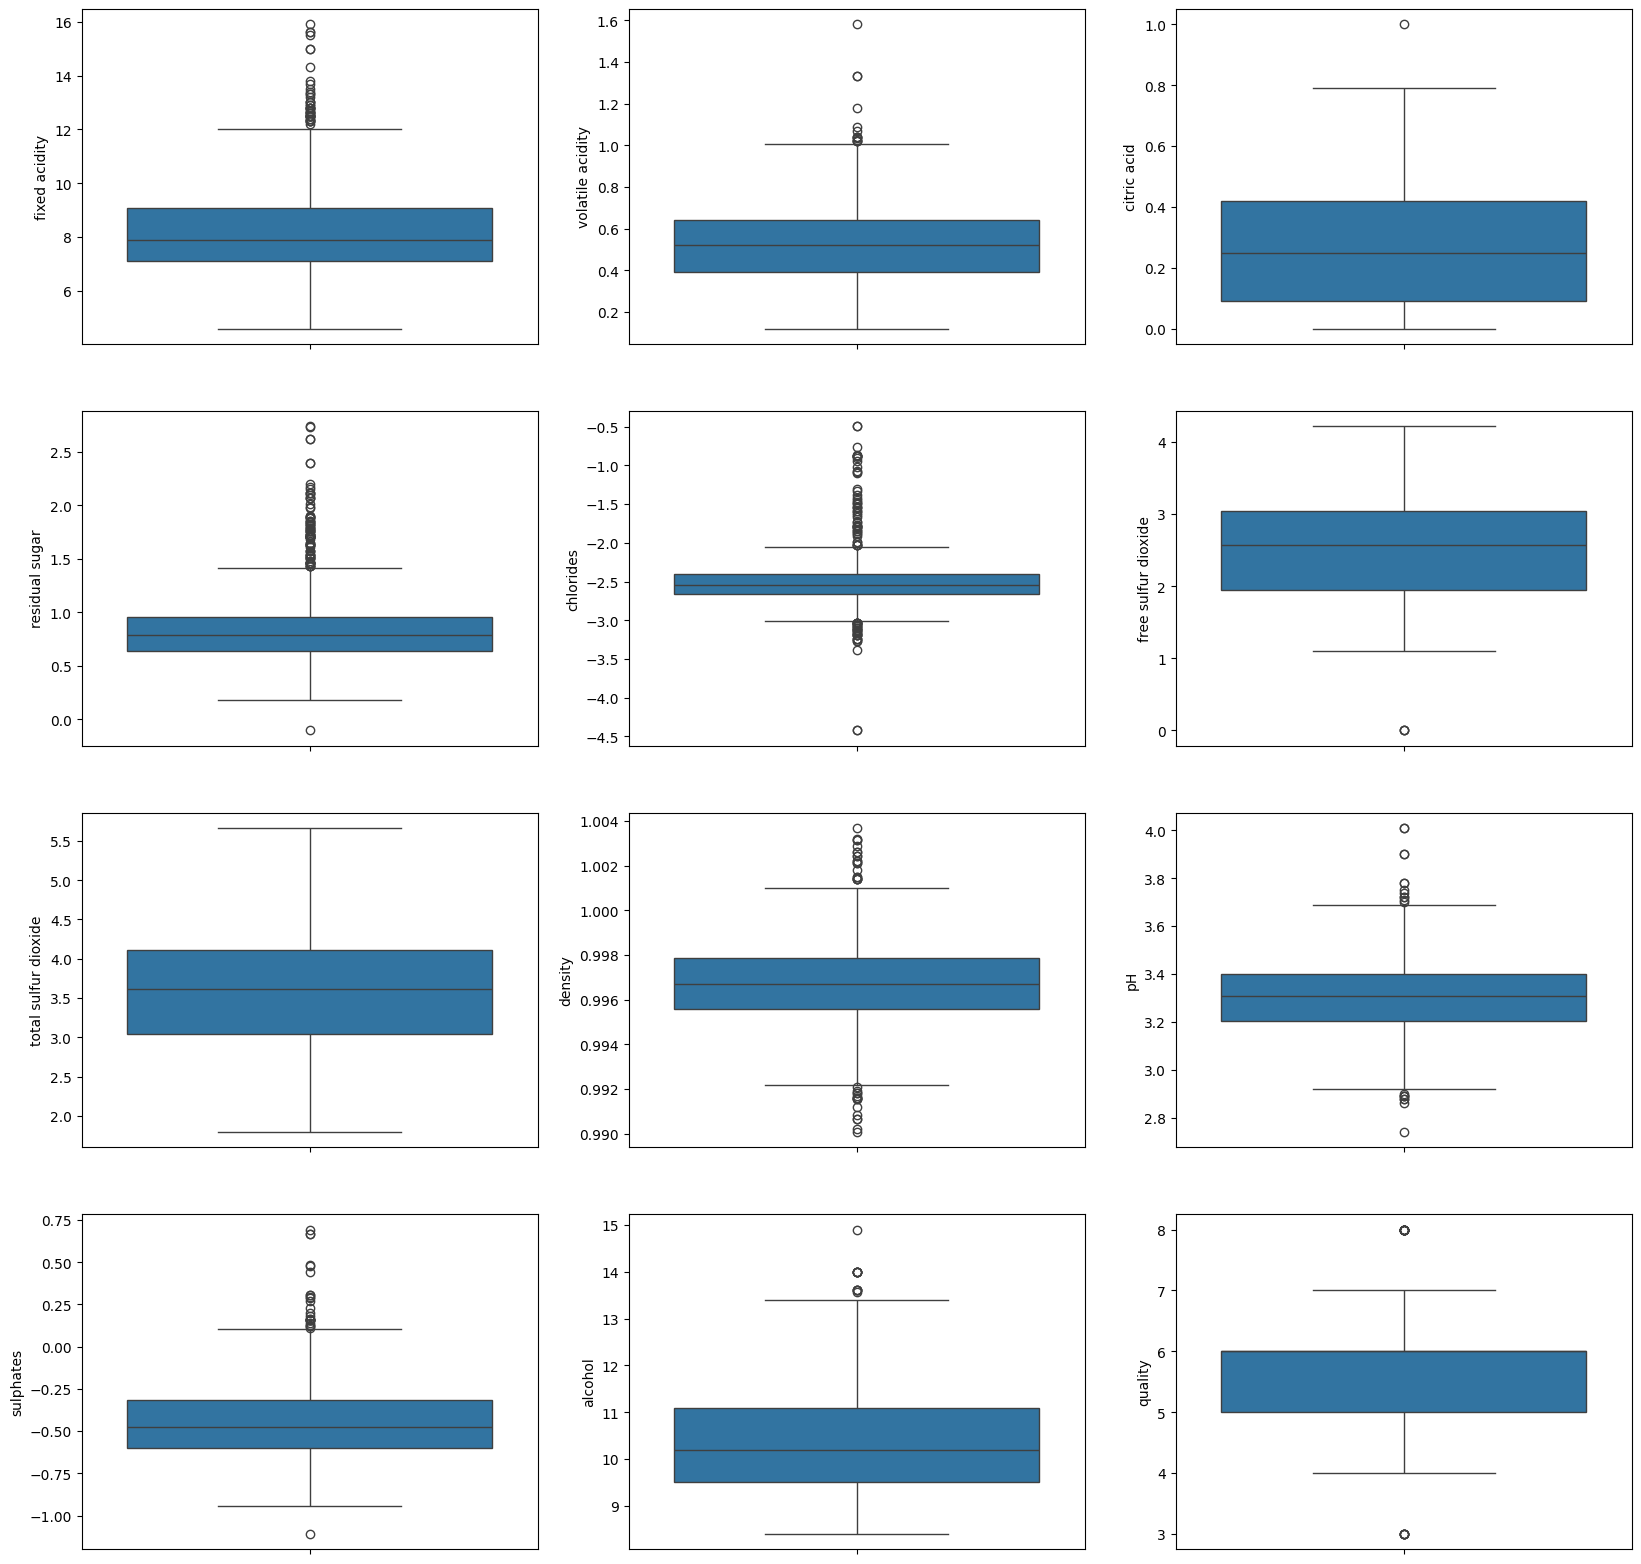

In [30]:
# find outliers
plt.figure(figsize=(20,20))
for i,col_name in enumerate(df.columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(df[col_name])
    
    

In [31]:
df = df[df['total sulfur dioxide']<200]


Text(0.5, 1.0, 'Correlation')

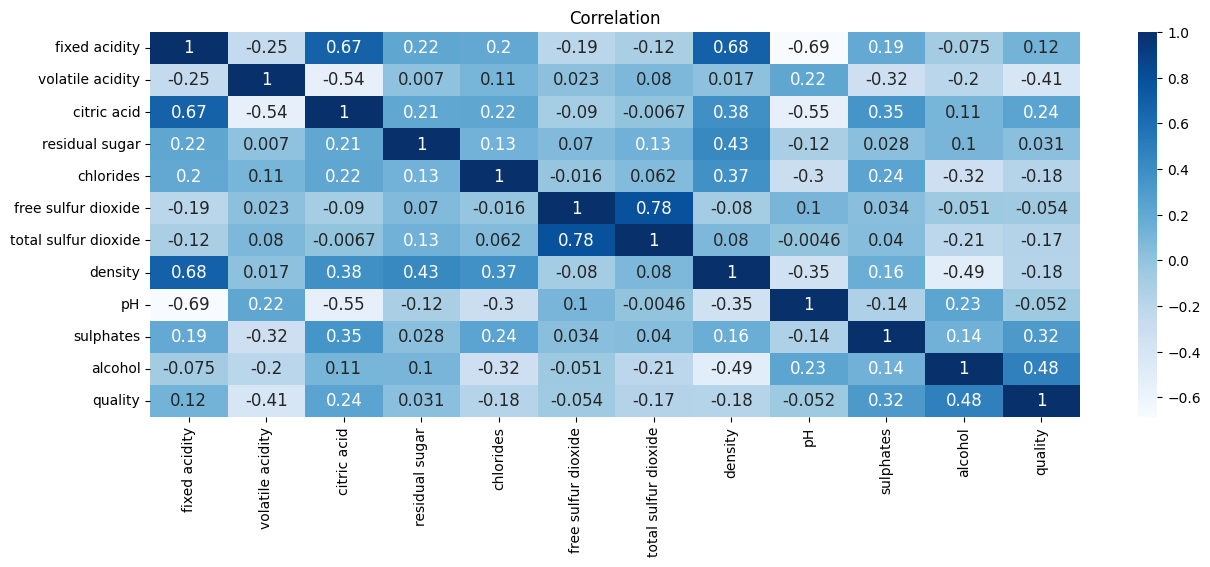

In [32]:
corr = df.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(corr, annot=True, cmap="Blues", annot_kws={"fontsize":12})
plt.title("Correlation")


In [33]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [34]:
# SMOTE Oversampling
from imblearn.over_sampling import SMOTE

#Define inputs and output
X=df.drop(['quality'],axis=1)
y=df['quality']

#Do oversampling
strategy={4:350,7:350,8:350,3:350}

oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)


In [43]:
print('Orginal Dataset shape:',df.shape)
print('X by build oversampling',X.shape)
print('y by build oversampling',y.shape)


Orginal Dataset shape: (1143, 12)
X by build oversampling (2345, 11)
y by build oversampling (2345,)


<Axes: xlabel='quality', ylabel='count'>

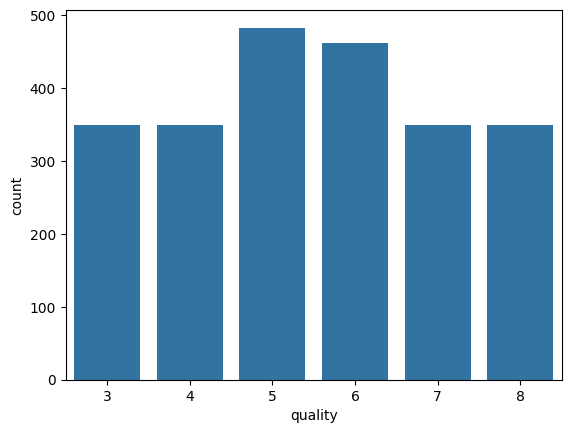

In [44]:
sns.countplot(x=y)

In [45]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000
mean,8.387338,0.580042,0.278339,0.874814,-2.516209,2.366805,3.378809,0.996663,3.318511,-0.452494,10.619123
std,1.703838,0.242281,0.202785,0.338703,0.306752,0.660901,0.679405,0.001913,0.151536,0.218028,1.186835
min,4.600000,0.120000,0.000000,-0.105361,-4.422849,0.000000,1.791759,0.990070,2.740000,-1.108663,8.400000
25%,7.200000,0.390000,0.080000,0.652663,-2.664907,1.791759,2.809991,0.995380,3.220000,-0.597837,9.600000
50%,8.069176,0.543534,0.268737,0.788457,-2.558825,2.397895,3.332205,0.996600,3.311107,-0.478036,10.400000
75%,9.382722,0.711567,0.450000,0.993252,-2.416415,2.838364,3.876023,0.997800,3.410000,-0.314711,11.500000
max,15.900000,1.580000,1.000000,2.740840,-0.492658,4.219508,5.666427,1.003690,4.010000,0.693147,14.900000


In [46]:
#Normalization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)



In [49]:
#Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=30)

In [51]:
from sklearn.linear_model import ElasticNet

In [52]:
lr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
lr.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [54]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)

    return rmse, mae, r2

In [56]:
predicted_value = lr.predict(X_valid)

In [57]:
predicted_value

array([6.64767878, 5.79353806, 6.54156632, 6.81214429, 5.08020156,
       6.05190522, 5.40637173, 6.4969698 , 7.31836703, 4.06101883,
       4.31480619, 7.26199773, 4.52131803, 4.35043601, 5.20561334,
       3.40286879, 6.05848474, 7.1683051 , 4.93385713, 7.49363756,
       7.47067591, 5.53657686, 7.42424237, 6.19433714, 6.81025323,
       4.77513695, 6.89943073, 6.34015158, 7.15856556, 4.65700828,
       6.12292982, 7.67825462, 7.43308064, 7.0068499 , 5.15830891,
       2.80652648, 7.31425195, 7.40914379, 7.53974247, 4.14490189,
       4.36412115, 5.30092059, 5.32880419, 6.81347228, 7.06101777,
       4.03673722, 6.16846209, 3.10590422, 6.00350628, 4.53107653,
       4.24581148, 7.43015321, 5.08160174, 6.35728612, 4.96061735,
       7.40999639, 7.09128926, 4.34375162, 6.04641926, 4.38533711,
       4.81873732, 5.67828618, 4.82989445, 4.22519875, 7.15983371,
       7.58055132, 6.10978222, 4.60883991, 5.18859107, 6.27761662,
       4.90218325, 5.81746228, 7.01640024, 4.9230134 , 4.65802

In [58]:
(rmse, mae, r2) = eval_metrics(y_valid, predicted_value)

In [59]:
print("rmse = ", rmse)
print("mae = ", mae)
print("r2 = ", r2)

rmse =  0.9121444235048379
mae =  0.7617392676187196
r2 =  0.6917324598475749
